In [ ]:
install.packages("sf")
install.packages("ggplot2")
install.packages("ggmap")  # for having a map as background

# NEED the development version of ggmap
if (!requireNamespace("devtools", quietly = TRUE)) {
  install.packages("devtools")
}
devtools::install_github("dkahle/ggmap")

Warning message:
"正在使用'sf'这个程序包，因此不会被安装"
Warning message:
"正在使用'ggplot2'这个程序包，因此不会被安装"
Warning message:
"正在使用'ggmap'这个程序包，因此不会被安装"
Using GitHub PAT from the git credential store.



Skipping install of 'ggmap' from a github remote, the SHA1 (8b12bebc) has not changed since last install.
  Use `force = TRUE` to force installation



In [29]:
library(ggmap)
library(ggplot2)
library(sf)

register_stadiamaps(key = "953a00a4-1c69-45b1-a0e4-b3492abdf92b")

In [30]:
# Read Bus Stops' Shapefile
shapefile_path <- "./transit_data/Stops.shp"
stops_data <- st_read(shapefile_path)

# Read 22 Areas' GeoJSON
local_areas <- st_read("./transit_data/local-area-boundary.geojson")

# Union 22 Araas to one polygon
vancouver_union <- st_union(local_areas)

# make sure the crs is the same
vancouver_union <- st_transform(vancouver_union, crs = 4326)
stops_data <- st_transform(stops_data, crs = st_crs(vancouver_union))

# filter out stops that are not in Vancouver
vancouver_data <- st_intersection(stops_data, vancouver_union)

Reading layer `Stops' from data source 
  `D:\ME 2024 UBC\ECON 326\econ326\transit_data\Stops.shp' using driver `ESRI Shapefile'
Simple feature collection with 8785 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -123.4231 ymin: 49.00439 xmax: -122.3029 ymax: 49.47356
Geodetic CRS:  WGS 84
Reading layer `local-area-boundary' from data source 
  `D:\ME 2024 UBC\ECON 326\econ326\transit_data\local-area-boundary.geojson' 
  using driver `GeoJSON'
Simple feature collection with 22 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.2248 ymin: 49.19894 xmax: -123.0232 ymax: 49.29581
Geodetic CRS:  WGS 84


Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


In [31]:
# set up the map's bounding box
bbox <- st_bbox(vancouver_union)
print("Bounding Box:")
print(bbox)

map_bbox <- c(
  left = as.numeric(bbox["xmin"]),
  bottom = as.numeric(bbox["ymin"]),
  right = as.numeric(bbox["xmax"]),
  top = as.numeric(bbox["ymax"])
)
print("Map BBox:")
print(map_bbox)

[1] "Bounding Box:"
      xmin       ymin       xmax       ymax 
-123.22485   49.19894 -123.02320   49.29581 
[1] "Map BBox:"
      left     bottom      right        top 
-123.22485   49.19894 -123.02320   49.29581 


ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


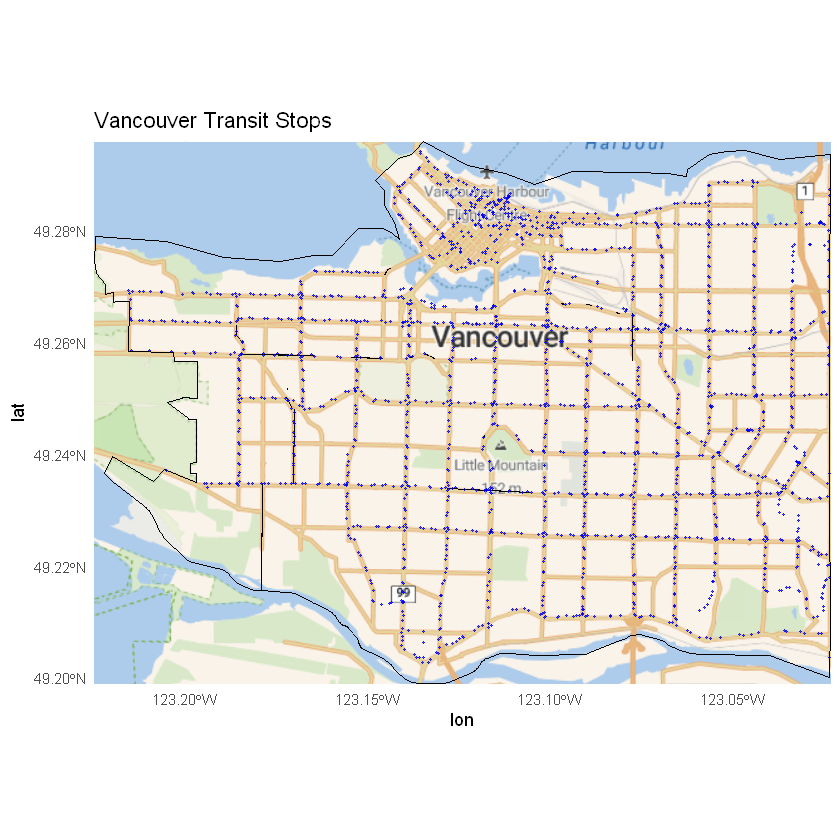

In [32]:
desired_zoom <- 12

# Use the stadiamaps package to get a base map
base_map <- tryCatch(
  {
    get_stadiamap(
      bbox = map_bbox,
      zoom = desired_zoom,
      maptype = "outdoors",
      # Can be be one of "stamen_terrain", "stamen_toner", "stamen_toner_lite",
      # "stamen_watercolor", "alidade_smooth",
      # "alidade_smooth_dark", "outdoors", "stamen_terrain_background",
      # "stamen_toner_background""stamen_terrain_labels""stamen_terrain_lines"
      #"stamen_toner_labels", "stamen_toner_lines"
    )
  },
  error = function(e) {
    message("[ERROR]: cannot generate stadiamap ", e$message)
    NULL
  }
)

# Generate the map with ggplot2
ggmap(base_map) +
  geom_sf(
    data = vancouver_union,
    fill = NA,
    color = "black",
    inherit.aes = FALSE
  ) +
  geom_sf(
    data = vancouver_data,
    color = "blue",
    size = 0.5,
    alpha = 0.7,
    inherit.aes = FALSE
  ) +
  theme_minimal() +
  labs(title = "Vancouver Transit Stops")
